# Wind

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/pressure/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Read longterm mean zonal (u) and meridional wind data

In [83]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [84]:
# longterm mean u and v
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/uwnd.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/vwnd.mon.ltm.nc'

with xr.open_dataset(file1) as ds1:
    print(ds1)
    u=ds1.uwnd # Unit is m/s
    #print(u)
    
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    v=ds2.vwnd # Unit is m/s
    #print(v)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    uwnd                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    title:                          monthly mean u wind from the NCEP Reanalysis
    description:                    Data from NCEP initialized reanalysis (4x...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 20

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


### Calculate annual and zonal averages

In [90]:
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r
u_ann1000=u.mean("time").isel(level=0).data
v_ann1000=v.mean("time").isel(level=0).data
u_ann850=u.mean("time").isel(level=2).data
v_ann850=v.mean("time").isel(level=2).data
u_ann200=u.mean("time").isel(level=9).data
v_ann200=v.mean("time").isel(level=9).data
lon=ds1.lon.data
lat=ds1.lat.data

speed1000=np.sqrt(u_ann1000**2+v_ann1000**2)
speed850=np.sqrt(u_ann850**2+v_ann850**2)
speed200=np.sqrt(u_ann200**2+v_ann200**2)
ds1.level

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [1000.   10.]
    axis:          Z

### Surface wind

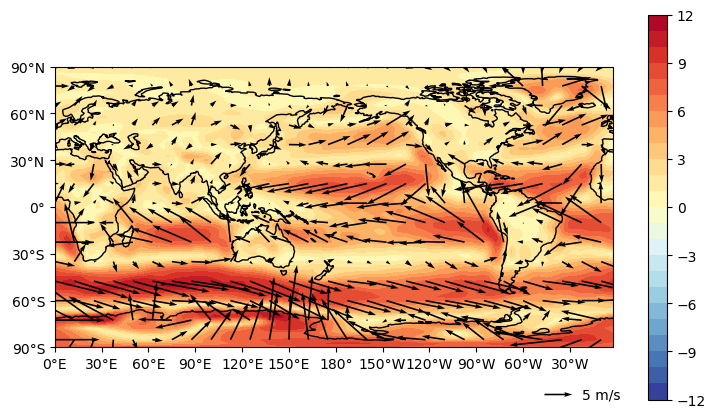

In [93]:
lev1=np.arange(-12,13,1)
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=ax.contourf(lon,lat,speed1000, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
q=ax.quiver(lon[::5],lat[::5],u_ann1000[::5,::5],v_ann1000[::5,::5],transform=proj,scale=100,color='k')

plt.colorbar(cs, orientation='vertical') # color map
plt.quiverkey(q, 0.7, 0.12, 5, '5 m/s', labelpos='E',
                   coordinates='figure')
ax.coastlines()

#ax.set_extent([-180, -60, -20, 10]) # lon lat extent

# Adding axis labels
xx=np.arange(-180,180,30)
yy=np.arange(-90,120,30)

ax.set_xticks(xx, crs=ccrs.PlateCarree())
ax.set_yticks(yy, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

### Wind at 850 hPa
Note that the scale is different.

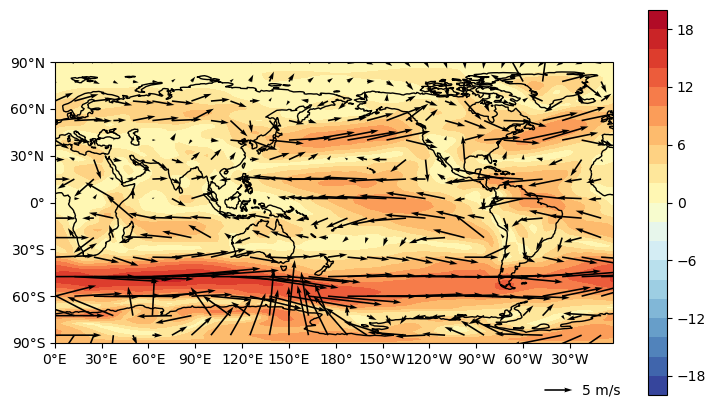

In [95]:
lev1=np.arange(-20,22,2)
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=ax.contourf(lon,lat,speed850, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
q=ax.quiver(lon[::5],lat[::5],u_ann850[::5,::5],v_ann850[::5,::5],transform=proj,scale=100,color='k')

plt.colorbar(cs, orientation='vertical') # color map
plt.quiverkey(q, 0.7, 0.12, 5, '5 m/s', labelpos='E',
                   coordinates='figure')
ax.coastlines()

#ax.set_extent([-180, -60, -20, 10]) # lon lat extent

# Adding axis labels
xx=np.arange(-180,180,30)
yy=np.arange(-90,120,30)

ax.set_xticks(xx, crs=ccrs.PlateCarree())
ax.set_yticks(yy, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

### Wind at 200 hPa
Note that the scale is different.

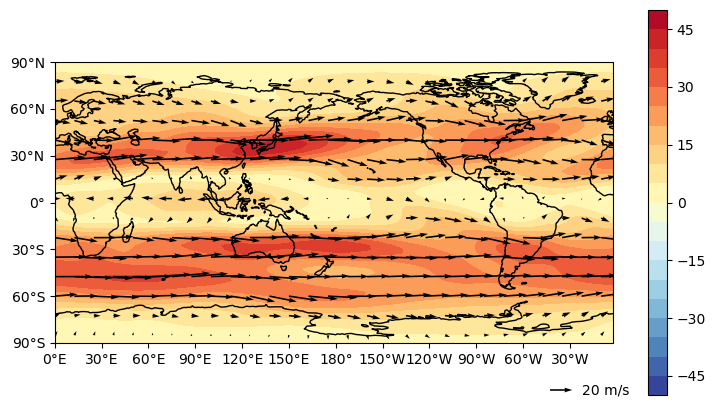

In [96]:
lev1=np.arange(-50,55,5)
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=ax.contourf(lon,lat,speed200, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
q=ax.quiver(lon[::5],lat[::5],u_ann200[::5,::5],v_ann200[::5,::5],transform=proj,scale=500,color='k')
plt.colorbar(cs, orientation='vertical') # color map
plt.quiverkey(q, 0.7, 0.12, 20, '20 m/s', labelpos='E',
                   coordinates='figure')

ax.coastlines()
#ax.set_extent([-180, -60, -20, 10]) # lon lat extent

# Adding axis labels
xx=np.arange(-180,180,30)
yy=np.arange(-90,120,30)

ax.set_xticks(xx, crs=ccrs.PlateCarree())
ax.set_yticks(yy, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

### Exercise 1
Explain the difference in annual mean low and upper level winds.

### Optional Exercises
Plot and explain seasonal variations of low and upper level wind.